In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('housing.csv')

## DATA UNDERSTANDING

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

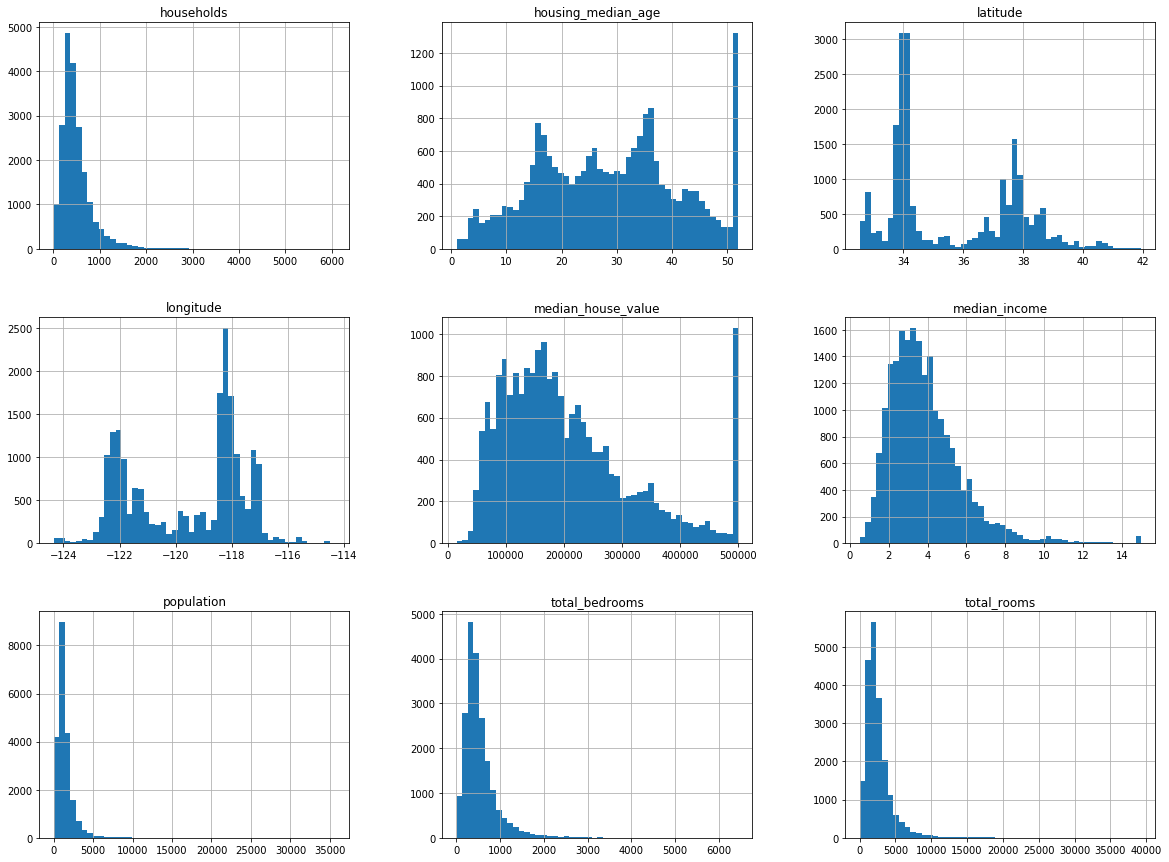

In [8]:
housing.hist(bins=50, figsize=(20,15)) #plot all numerical attributes
plt.show()

## DATA SAMPLING

In [9]:
import numpy as np
'''
create income category attribute by dividing the median income by 1.5(to limit the number of categories)
rounding up using ceil(to have discrete categories), and then merging all the categories greater than 5 into category 5:

'''
housing['income_category'] = np.ceil(housing['median_income']/1.5)
housing['income_category'].where(housing['income_category']<5,5.0,inplace=True)

In [10]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size =0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
housing['income_category'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [12]:
#income category proportions in test and train dataset
strat_train_set['income_category'].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_category, dtype: float64

In [13]:
strat_test_set['income_category'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

## DATA EXPLORATION : INSIGHTS

In [14]:
# from now on analyze the training set only, forget and don't touch test
housing = strat_train_set.copy()

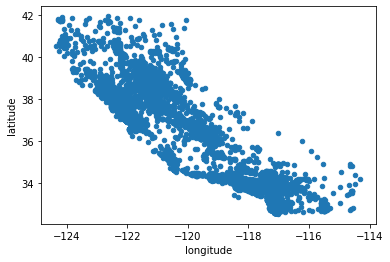

In [15]:
# Geographical info : scatter
housing.plot(kind="scatter",x='longitude',y='latitude')

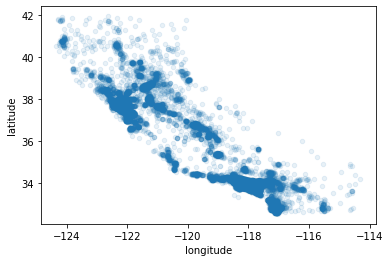

In [16]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

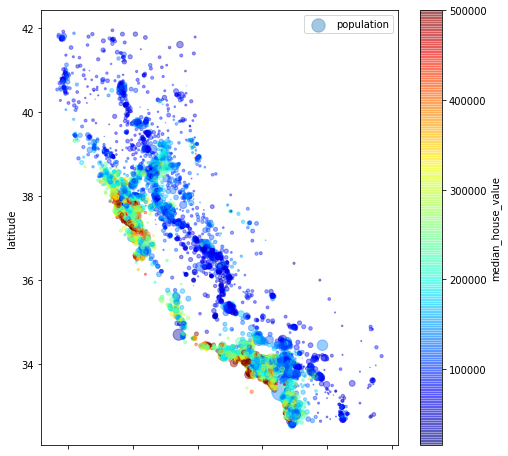

In [17]:

housing.plot(kind='scatter', x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100,label='population',
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,figsize=(8,8))
plt.legend()

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


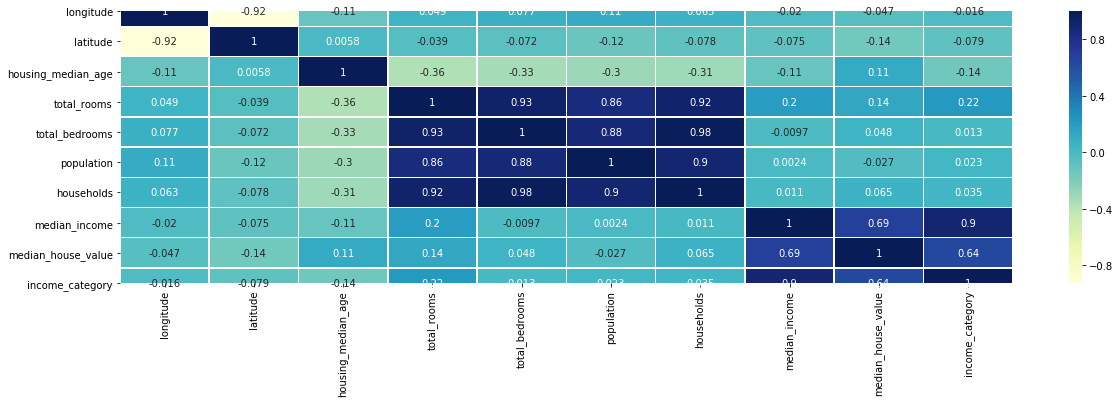

In [18]:
corr_mat = housing.corr()
corr_mat

import seaborn as sns
plt.figure(figsize=(20,5))

sns.heatmap(corr_mat,annot=True,linewidths=.5,cmap="YlGnBu")

In [19]:
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_category       0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

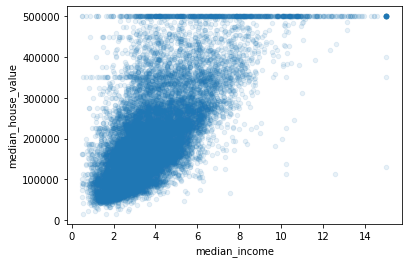

In [20]:
housing.plot(kind='scatter',y='median_house_value',x='median_income',alpha=0.1)

In [21]:
housing = housing.drop(columns = ['income_category'])

In [22]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [23]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']

In [24]:
corr_mat = housing.corr()
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
Name: median_house_value, dtype: float64

## DATA CLEANING

In [25]:
#seperate predicators and labels
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [26]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

housing_num = housing.drop(columns = 'ocean_proximity')

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
#Train imputer
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [29]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [30]:
#use trained imputer to fill missing values with learned medians
X = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [32]:
# transform text/categorical variables into numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [33]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
#custom transformers and estimators
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] 
        population_per_household = X[:,population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs = attr_adder.transform(housing.values)

## DATA PIPELINE

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler,OneHotEncoder

num_attrib = list(housing_num)
cat_attrib = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrib)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrib)),
    ('one_hot_encoder', OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipepline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<16512x17 sparse matrix of type '<class 'numpy.float64'>'
	with 214656 stored elements in Compressed Sparse Row format>

## MODEL SELECTION AND TRAINING

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:\t', lin_reg.predict(some_data_prepared))
print('Labels:\t',list(some_labels))

Predictions:	 [203682.37492664 326371.3944421  204218.64500058  58685.47379823
 194213.06510148]
Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459943

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [56]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#overfitting

0.0

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared,housing_labels,
                         scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores :', scores)
    print('Mean :', scores.mean())
    print('Standard deviation :', scores.std())
display_scores(rmse_scores)

Scores : [69620.18788697 68718.66917119 71855.36058455 67853.72949735
 71114.00127111 76592.82613633 72251.43397782 70388.72739351
 77268.99486428 69409.3158351 ]
Mean : 71507.32466182053
Standard deviation : 3003.801639594835


In [62]:
lin_scores = cross_val_score(lin_reg, housing_prepared,housing_labels,
                            scoring = 'neg_mean_squared_error',cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores : [66877.52322854 66608.12027529 70575.91157604 74179.9479792
 67683.32214626 71103.16842243 64782.65897341 67711.29942276
 71080.4048008  67687.63846634]
Mean : 68828.9995291057
Standard deviation : 2662.7615822916887


In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,
                              scoring = 'neg_mean_squared_error',cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores : [50541.75457911 50145.82456594 52345.32256153 55458.59220066
 52191.48869487 54964.17541214 51187.3804565  50563.28562553
 56468.0748124  53105.00754012]
Mean : 52697.0906448796
Standard deviation : 2133.505026041215


## SAVE MODEL USING JOBLIB AND PICKLE

In [66]:
from sklearn.externals import joblib
joblib.dump(my_model,"my_model.pkl")
# and later
my_model_loaded = joblib.load("my_model.pkl")

NameError: name 'my_model' is not defined

## FINE-TUNE MODEL

In [69]:
# search for best possible combinations of hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},

{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [70]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [72]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63625.224964777735 {'max_features': 2, 'n_estimators': 3}
56255.459408438765 {'max_features': 2, 'n_estimators': 10}
53287.575875961855 {'max_features': 2, 'n_estimators': 30}
61241.58393883267 {'max_features': 4, 'n_estimators': 3}
53417.60337405506 {'max_features': 4, 'n_estimators': 10}
51531.838115272236 {'max_features': 4, 'n_estimators': 30}
59940.308588689666 {'max_features': 6, 'n_estimators': 3}
52807.65446121278 {'max_features': 6, 'n_estimators': 10}
50583.33533015929 {'max_features': 6, 'n_estimators': 30}
58839.48091299732 {'max_features': 8, 'n_estimators': 3}
52768.81076174887 {'max_features': 8, 'n_estimators': 10}
50767.44425326406 {'max_features': 8, 'n_estimators': 30}
63384.33393808602 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54807.46941602311 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60179.86348949343 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53644.612515775756 {'bootstrap': False, 'max_features': 3, 'n_estimator

## ANALYZE BEST MODELS

In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.77511096e-02, 6.00406768e-02, 4.47153826e-02, 1.82448144e-02,
       1.78904159e-02, 1.71598808e-02, 1.76528942e-02, 2.22529219e-01,
       1.77403626e-01, 4.93114816e-02, 1.02347289e-01, 4.97132702e-02,
       1.26033265e-02, 1.33411666e-01, 5.79791396e-05, 3.88339684e-03,
       5.28357062e-03])

In [80]:
extra_attribs = ['room_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_one_hot_attribs = list(encoder.categories_)
attributes = num_attrib + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.22252921888590244, 'median_income'),
 (0.17740362630315681, 'income_category'),
 (0.10234728927585682, 'pop_per_hhold'),
 (0.06775110958123441, 'longitude'),
 (0.0600406768477194, 'latitude'),
 (0.04971327019207885, 'bedrooms_per_room'),
 (0.04931148159162827, 'room_per_hhold'),
 (0.0447153826283442, 'housing_median_age'),
 (0.018244814389044812, 'total_rooms'),
 (0.01789041589872928, 'total_bedrooms'),
 (0.017652894234730283, 'households'),
 (0.01715988079847436, 'population'),
 (0.01260332654208165, array([0., 1., 2., 3., 4.]))]

## EVALUATE SYSTEM ON TEST_SET

In [82]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48502.7194087692

In [83]:
## Document everything : what you have learned, what worked, what did not, what assumptions were made, what your systems limitation are, create presentations with clear visualization